In [2]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [3]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [4]:
data = read_idx('./data/train-images.idx3-ubyte')

In [34]:
train_labels = read_idx('./data/train-labels.idx1-ubyte')

In [5]:
data = data.reshape(60000, 28*28)

In [36]:
train_labels[55]

8

In [6]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [100]:
class Layer:
    def __init__(self, input_size, size, activation_function, activation_prime, W=None, b=None, init=None):
        self.size = size
        if W == None:
            if init == None:
                self.W = np.random.normal(0, 0.01, (size, input_size))
        else:
            self.W = W
        self.b = np.zeros(size)
        self.func = activation_function
        
        self.z = 0
        self.a = 0
        
    def predict(self, input):
        self.z = self.b + self.W.dot(input)
        self.a = self.func(self.z)
        return self.a

In [126]:
class MLP:
    def __init__(self, input_size, output_size, *args):
        self.input_size = input_size
        self.output_size = output_size
        
        for a in args:
            self.hidden_layers = args
        self.input_layer = Layer(input_size, self.hidden_layers[0].size, np.tanh, lambda x:1-np.tanh(x)**2)
        self.output_layer = Layer(self.hidden_layers[-1].size, self.output_size, softmax, np.tanh)
        self.layers = (self.input_layer,) + self.hidden_layers + (self.output_layer,)
    
    def predict(self, input):
        a = input
        for f in self.layers:
            a = f.predict(a)
        return a
    
    def loss(self, x, y):
        return (1 - y * np.log(self.predict(x))).sum()
    
    def grad(beta):
        pass

In [127]:
hl = Layer(28*28, 28*28, np.tanh, lambda x:1-np.tanh(x)**2)

In [128]:
mlp = MLP(28*28, 10, hl)

In [129]:
np.log(mlp.predict(data[55]))

array([-2.33623176, -2.19366559, -2.37318806, -2.25244386, -2.3431205 ,
       -2.30431382, -2.33273272, -2.27766288, -2.44936653, -2.19176428])

<BarContainer object of 10 artists>

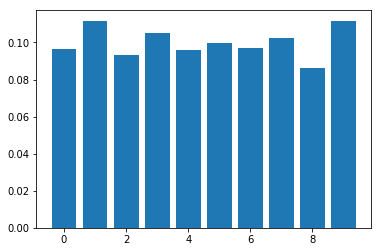

In [130]:
plt.bar(range(10), mlp.predict(data[55]))

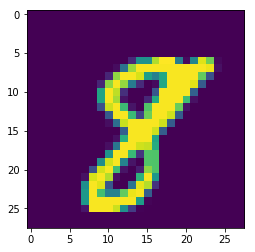

In [131]:
plt.imshow(data[55].reshape((28,28)))

In [132]:
y = np.array([0,0,0,0,0,0,0,0,1,0])

In [133]:
mlp.loss(data[48], y)

12.141221556623947

In [134]:
f = lambda x:np.tanh

In [135]:
f(1)

<ufunc 'tanh'>